In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#Import 'Box Office Mojo' database
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv')

bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [53]:
#Import 'The Movie Database'
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv')

tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [54]:
#Merge 'Box Office Mojo' and 'The Movie Database' on title
#Disregard values not common to both tables
bom_tmdb_df = pd.merge(bom_df, tmdb_df, on = 'title', how = 'right')

bom_tmdb_df.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010.0,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010.0,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010.0,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [55]:
bom_df.shape

(3387, 5)

In [56]:
tmdb_df.shape

(26517, 10)

In [57]:
#Determine rows/columns of newly created dataframe
bom_tmdb_df.shape

(26517, 14)

In [6]:
#Import Wikipedia database
wiki_plot_df = pd.read_csv('./zippedData/wiki_movie_plots_deduped.csv')

wiki_plot_df.head()

FileNotFoundError: File b'./zippedData/wiki_movie_plots_deduped.csv' does not exist

In [228]:
#Rename Title column to merge on 'title'
wiki_plot_df.rename(columns = {'Title':'title'}, inplace = True)

wiki_plot_df.head()

NameError: name 'wiki_plot_df' is not defined

In [229]:
#Merge Wikipedia database with previously merged dataset
bom_tmdb_wiki_df = pd.merge(bom_tmdb_df, wiki_plot_df, on = 'title', how = 'inner')

bom_tmdb_wiki_df.head()

NameError: name 'wiki_plot_df' is not defined

In [230]:
bom_tmdb_wiki_df.columns

NameError: name 'bom_tmdb_wiki_df' is not defined

In [231]:
bom_tmdb_wiki_df.shape

NameError: name 'bom_tmdb_wiki_df' is not defined

In [7]:
#Import movie plot synopses database
mpst_df = pd.read_csv('./zippedData/mpst-movie-plot-synopses-with-tags/mpst_full_data.csv')

mpst_df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [8]:
#Merge datasets together
bom_tmdb_mpst_df = pd.merge(bom_tmdb_df, mpst_df, on = 'title', how = 'inner')

bom_tmdb_mpst_df.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,imdb_id,plot_synopsis,tags,split,synopsis_source
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,tt0435761,Andy Davis (voice: John Morris) is 17 years ol...,"comedy, boring, violence, flashback, good vers...",train,imdb
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,tt1375666,"A young man, exhausted and delirious, washes u...","boring, neo noir, murder, sentimental, fantasy...",val,imdb
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,tt0892791,The movie begins just before Shrek (voiced by ...,"comedy, fantasy, action",train,imdb
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,tt1325004,Eclipse opens at nighttime where Riley Biers (...,"paranormal, revenge, murder, entertaining, fla...",train,imdb
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,tt1228705,The movie opens several months after the event...,"good versus evil, revenge, humor, action, murder",train,imdb


In [234]:
bom_tmdb_mpst_df.shape

(1282, 19)

In [9]:
import pandas as pd

#Import IMDB name basics database
imdb_name_df = pd.read_csv('./zippedData/imdb.name.basics.csv')

In [236]:
imdb_name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [10]:
imdb_title_df = pd.read_csv('./zippedData/imdb.title.akas.csv')

#Import IMDB title database
imdb_title_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [11]:
imdb_title_basics_df = pd.read_csv('./zippedData/imdb.title.basics.csv')

#Import IMDB title basics database
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [58]:
imdb_title_basics_df.rename(columns = {'primary_title': 'title'}, inplace = True)

In [59]:
#Merge datasets
tmdb_imdb_df = pd.merge(imdb_title_basics_df, tmdb_df, on = 'title', how = 'right')

tmdb_imdb_df.head()


,tconst,title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017.0,NaN,"Horror,Thriller",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
2,tt4503112,Bigfoot,Bigfoot,2018.0,NaN,"Action,Horror",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
3,tt9181914,Bigfoot,Bigfoot,2018.0,86.0,"Animation,Family",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
4,tt0192528,Heaven & Hell,Reverse Heaven,2018.0,104.0,Drama,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,7.5,2


In [14]:
#Import ratings database
imdb_title_ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv')

imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [60]:
#Merge datasets
rating_tmdb_imdb_df = pd.merge(tmdb_imdb_df, imdb_title_ratings_df, on='tconst', how = 'left')

In [243]:
rating_tmdb_imdb_df.head()

,tconst,title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,vote_average,vote_count,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,7.0,64,6.9,4517
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26,4.1,32
2,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26,4.6,9
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26,2.5,55
4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,7.5,2,4.0,72


In [71]:
#Merge datasets
merged_df = pd.merge(rating_tmdb_imdb_df, bom_tmdb_mpst_df, on='title', how='inner')

In [245]:
merged_df.head()

,tconst,title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0_x,genre_ids_x,id_x,original_language_x,...,original_title,popularity_y,release_date_y,vote_average_y,vote_count_y,imdb_id,plot_synopsis,tags,split,synopsis_source
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",5350,"[12, 18]",83770,en,...,On the Road,8.919,2012-12-21,5.6,518,tt0337692,The two main characters of the book are the na...,flashback,train,wikipedia
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,5350,"[12, 18]",83770,en,...,On the Road,8.919,2012-12-21,5.6,518,tt0337692,The two main characters of the book are the na...,flashback,train,wikipedia
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5350,"[12, 18]",83770,en,...,On the Road,8.919,2012-12-21,5.6,518,tt0337692,The two main characters of the book are the na...,flashback,train,wikipedia
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",11053,"[80, 18, 9648, 53]",169917,en,...,A Walk Among the Tombstones,19.373,2014-09-19,6.3,1685,tt0365907,"New York City, 1991Detective Matt Scudder (Lia...","suspenseful, neo noir, murder, violence, flash...",val,imdb
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",14193,"[28, 12, 878, 53]",135397,en,...,Jurassic World,20.709,2015-06-12,6.6,14056,tt0369610,Following the demise of dinosaur-themed Jurass...,"violence, satire",train,wikipedia


In [246]:
merged_df.columns

Index(['tconst', 'title', 'original_title_x', 'start_year', 'runtime_minutes',
       'genres', 'Unnamed: 0_x', 'genre_ids_x', 'id_x', 'original_language_x',
       'original_title_y', 'popularity_x', 'release_date_x', 'vote_average_x',
       'vote_count_x', 'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'Unnamed: 0_y', 'genre_ids_y', 'id_y',
       'original_language_y', 'original_title', 'popularity_y',
       'release_date_y', 'vote_average_y', 'vote_count_y', 'imdb_id',
       'plot_synopsis', 'tags', 'split', 'synopsis_source'],
      dtype='object')

In [72]:
merged_df.shape

(3225, 35)

In [73]:
#Drop unnecessary columns
merged_df.drop(columns=['original_title_x', 'start_year', 'Unnamed: 0_x', 'genre_ids_x', 'original_language_x', 'original_title_y', 'popularity_x', 'release_date_x', 'vote_average_x', 'vote_count_x', 'foreign_gross', 'year', 'Unnamed: 0_y', 'genre_ids_y', 'original_language_y', 'original_title', 'imdb_id', 'plot_synopsis', 'split', 'synopsis_source',], inplace=True)

In [74]:
#Drop additional columns
merged_df.drop(columns=['runtime_minutes', 'id_y', 'tags'], inplace=True)
merged_df.head()

,tconst,title,genres,id_x,averagerating,numvotes,studio,domestic_gross,popularity_y,release_date_y,vote_average_y,vote_count_y
0,tt0337692,On the Road,"Adventure,Drama,Romance",83770,6.1,37886.0,IFC,744000.0,8.919,2012-12-21,5.6,518
1,tt2404548,On the Road,Drama,83770,NaN,NaN,IFC,744000.0,8.919,2012-12-21,5.6,518
2,tt3872966,On the Road,Documentary,83770,NaN,NaN,IFC,744000.0,8.919,2012-12-21,5.6,518
3,tt4339118,On the Road,Drama,83770,6.0,6.0,IFC,744000.0,8.919,2012-12-21,5.6,518
4,tt5389486,On the Road,Documentary,83770,NaN,NaN,IFC,744000.0,8.919,2012-12-21,5.6,518


In [75]:
#drop column
merged_df.drop(columns=['id_x'], inplace=True)

In [76]:
#Rename columns
merged_df.rename(columns={'popularity_y':'popularity', 'release_date_y':'release_date', 'vote_average_y':'vote_average', 'vote_count_y':'vote_count'}, inplace=True)

In [251]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518
1,tt4339118,On the Road,Drama,6.0,6,IFC,744000.0,8.919,2012-12-21,5.6,518
2,tt5647250,On the Road,Drama,5.7,127,IFC,744000.0,8.919,2012-12-21,5.6,518
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056


In [67]:
merged_df.shape

(3225, 11)

In [77]:
#Drop rows with duplicate values
merged_df.drop_duplicates(subset='popularity', inplace=True)

In [78]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8.919,2012-12-21,5.6,518
6,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,19.373,2014-09-19,6.3,1685
7,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,20.709,2015-06-12,6.6,14056
8,tt0372538,Spy,"Action,Crime,Drama",6.6,78.0,Fox,110800000.0,1.400,2011-08-09,7.0,1
9,tt0372538,Spy,"Action,Crime,Drama",6.6,78.0,Fox,110800000.0,12.540,2015-06-05,6.8,3917


In [79]:
merged_df.shape

(1007, 11)

In [256]:
type(merged_df['genres'][0])

str

In [257]:
type(merged_df['release_date'][0])

str

In [22]:
#Create new column 'month' from release_date
merged_df['month'] = merged_df['release_date'].apply(lambda x: x.split('-'))

In [23]:
from dateutil.parser import parse

In [24]:
#Convert 'month' to 'datetime' datatype
merged_df['release_date'] = merged_df['release_date'].apply(lambda x: parse(x))

In [261]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,"[2012, 12, 21]"
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,"[2014, 09, 19]"
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,"[2015, 06, 12]"
5,tt0372538,Spy,"Action,Crime,Drama",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,"[2011, 08, 09]"
13,tt0376479,American Pastoral,"Crime,Drama",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,"[2016, 10, 21]"


In [25]:
merged_df['month'] = merged_df['release_date']

In [26]:
#Set the datetime object to the month only
merged_df['month'] = merged_df['month'].apply(lambda x: x.month)

In [264]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6
5,tt0372538,Spy,"Action,Crime,Drama",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8
13,tt0376479,American Pastoral,"Crime,Drama",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10


In [27]:
#Split 'genres' into list of values
merged_df['genres'] = merged_df['genres'].apply(lambda x: x.split(','))
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10


In [28]:
#Drop column 'genre'
merged_df.drop(columns=['genre'])

KeyError: "['genre'] not found in axis"

In [29]:
#Find the average gross per month
avg_gross_month = merged_df.groupby(['month']).mean()['domestic_gross']
avg_gross_month

month
1     4.169886e+07
2     5.847270e+07
3     6.691723e+07
4     3.518441e+07
5     9.662538e+07
6     1.017212e+08
7     8.840903e+07
8     5.423179e+07
9     5.068872e+07
10    4.036132e+07
11    8.287959e+07
12    7.692566e+07
Name: domestic_gross, dtype: float64

In [30]:
#Create new dataframe for all movies released in January
jan_df = merged_df[merged_df['month']==1]

In [269]:
jan_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
85,tt0472399,The Mechanic,"[Action, Crime, Thriller]",6.6,141254,CBS,29100000.0,14.387,2011-01-28,6.3,1676,1
141,tt0479997,Season of the Witch,"[Action, Adventure, Fantasy]",5.4,85777,Rela.,24800000.0,12.535,2011-01-07,5.3,1352,1
167,tt0808510,Tooth Fairy,"[Comedy, Family, Fantasy]",5.0,37939,Fox,60000000.0,12.650,2010-01-22,5.3,1058,1
196,tt0882977,Snitch,"[Action, Drama, Thriller]",6.5,78142,LG/S,42900000.0,0.600,2011-01-01,1.0,1,1
204,tt0884732,The Wedding Ringer,[Comedy],6.7,66893,SGem,64500000.0,15.876,2015-01-16,6.5,961,1


In [31]:
#Do the same for movies released in each month
feb_df = merged_df[merged_df['month']==2]
march_df = merged_df[merged_df['month']==3]
april_df = merged_df[merged_df['month']==4]
may_df = merged_df[merged_df['month']==5]
jun_df = merged_df[merged_df['month']==6]
jul_df = merged_df[merged_df['month']==7]
aug_df = merged_df[merged_df['month']==8]
sept_df = merged_df[merged_df['month']==9]
oct_df = merged_df[merged_df['month']==10]
nov_df = merged_df[merged_df['month']==11]
dec_df = merged_df[merged_df['month']==12]

In [271]:
dec_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
138,tt0477302,Extremely Loud & Incredibly Close,"[Adventure, Drama, Mystery]",6.9,93164,WB,31800000.0,9.828,2011-12-24,7.0,1231,12
161,tt0790724,Jack Reacher,"[Action, Crime, Thriller]",7.0,284547,Par.,80100000.0,18.312,2012-12-21,6.4,4155,12
210,tt0903624,The Hobbit: An Unexpected Journey,"[Adventure, Family, Fantasy]",7.9,719629,WB (NL),303000000.0,26.939,2012-12-14,7.2,12076,12
214,tt0935075,Rabbit Hole,[Drama],7.0,45357,LGF,2200000.0,9.389,2010-12-16,6.8,292,12


In [32]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10


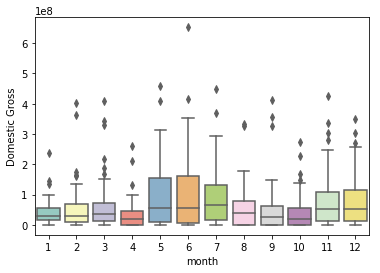

In [33]:
#Plot domestic gross per month with a boxplot
import seaborn as sns

ax = sns.boxplot(x="month", y="domestic_gross", data=merged_df, palette="Set3").set(ylabel= "Domestic Gross")

plt.show()

In [34]:
nested_list_genres = list(merged_df['genres'])

genre_list = [item for sublist in nested_list_genres for item in sublist]

genre_list

['Adventure',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Comedy',
 'Family',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Thriller',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Drama',
 'Family',
 'Drama',
 'Romance',
 'Sci-Fi',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Comedy',
 'Drama',
 'Romance',
 'Action',
 'Comedy',
 'Fantasy',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Drama',
 'Fantasy',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Horror',
 'Sci-Fi',
 'Comedy',
 'Horror',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Comedy',
 'Crime',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Crime',
 'Th

In [35]:
def unique(lst):
    unique_list = []
    for item in lst:
        if item not in unique_list:
            unique_list.append(item)
    return unique_list

In [36]:
unique_genres = unique(genre_list)
unique_genres

['Adventure',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'Sci-Fi',
 'Comedy',
 'Family',
 'Animation',
 'Thriller',
 'Mystery',
 'Horror',
 'Biography',
 'History',
 'Fantasy',
 'Music',
 'War',
 'Sport',
 'Western',
 'Documentary',
 'Musical']

In [37]:
def adventure():
    adv_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Adventure' in nested_list_genres[ind]:
            adv_list[ind] = 1
        else:
            adv_list[ind] = 0
    return adv_list
            

adventure()[0:10]



[1, 0, 1, 0, 0, 0, 1, 1, 0, 0]

In [38]:
genre_dict = dict(enumerate(nested_list_genres))
genre_dict

# # test_list

# for val in genre_dict:
#     if 'Adventure' in val:
#         val = '1'
#     else:
#         val = '0'
        
genre_dict

{0: ['Adventure', 'Drama', 'Romance'],
 1: ['Action', 'Crime', 'Drama'],
 2: ['Action', 'Adventure', 'Sci-Fi'],
 3: ['Action', 'Crime', 'Drama'],
 4: ['Crime', 'Drama'],
 5: ['Comedy', 'Family'],
 6: ['Adventure', 'Animation', 'Comedy'],
 7: ['Action', 'Adventure', 'Sci-Fi'],
 8: ['Action', 'Sci-Fi', 'Thriller'],
 9: ['Drama', 'Mystery', 'Sci-Fi'],
 10: ['Comedy'],
 11: ['Action', 'Adventure', 'Thriller'],
 12: ['Horror', 'Mystery', 'Thriller'],
 13: ['Action', 'Drama', 'Family'],
 14: ['Drama', 'Romance', 'Sci-Fi'],
 15: ['Adventure', 'Animation', 'Comedy'],
 16: ['Biography', 'Drama', 'History'],
 17: ['Comedy', 'Drama', 'Romance'],
 18: ['Action', 'Comedy', 'Fantasy'],
 19: ['Action', 'Adventure', 'Animation'],
 20: ['Action', 'Adventure', 'Fantasy'],
 21: ['Adventure', 'Drama', 'Fantasy'],
 22: ['Horror', 'Thriller'],
 23: ['Action', 'Crime', 'Thriller'],
 24: ['Action', 'Adventure', 'Sci-Fi'],
 25: ['Drama', 'Horror', 'Sci-Fi'],
 26: ['Comedy', 'Horror'],
 27: ['Drama', 'Mystery',

In [282]:
merged_df.to_csv("merged.csv", index=False)

In [39]:
def drama():
    dra_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Drama' in nested_list_genres[ind]:
            dra_list[ind] = 1
        else:
            dra_list[ind] = 0
    return dra_list

drama()[0:10]

[1, 1, 0, 1, 1, 0, 0, 0, 0, 1]

In [40]:
def romance():
    rom_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Romance' in nested_list_genres[ind]:
            rom_list[ind] = 1
        else:
            rom_list[ind] = 0
    return rom_list

romance()[0:10]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
def action():
    act_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Action' in nested_list_genres[ind]:
            act_list[ind] = 1
        else:
            act_list[ind] = 0
    return act_list
            

action()[0:10]

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0]

In [287]:
def crime():
    cri_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Crime' in nested_list_genres[ind]:
            cri_list[ind] = 1
        else:
            cri_list[ind] = 0
    return cri_list
            

crime()[0:10]

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]

In [42]:
def scifi():
    sci_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Sci-Fi' in nested_list_genres[ind]:
            sci_list[ind] = 1
        else:
            sci_list[ind] = 0
    return sci_list
            

scifi()[0:10]

[0, 0, 1, 0, 0, 0, 0, 1, 1, 1]

In [289]:
def comedy():
    com_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Comedy' in nested_list_genres[ind]:
            com_list[ind] = 1
        else:
            com_list[ind] = 0
    return com_list
            

comedy()[0:10]

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [290]:
def family():
    fam_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Family' in nested_list_genres[ind]:
            fam_list[ind] = 1
        else:
            fam_list[ind] = 0
    return fam_list
            

family()[0:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [291]:
def animation():
    ani_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Animation' in nested_list_genres[ind]:
            ani_list[ind] = 1
        else:
            ani_list[ind] = 0
    return ani_list
            

animation()[0:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [292]:
def thriller():
    thr_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Thriller' in nested_list_genres[ind]:
            thr_list[ind] = 1
        else:
            thr_list[ind] = 0
    return thr_list
            

thriller()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [293]:
def mystery():
    mys_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Mystery' in nested_list_genres[ind]:
            mys_list[ind] = 1
        else:
            mys_list[ind] = 0
    return mys_list
            

mystery()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [294]:
def horror():
    hor_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Horror' in nested_list_genres[ind]:
            hor_list[ind] = 1
        else:
            hor_list[ind] = 0
    return hor_list
            

horror()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [295]:
def biography():
    bio_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Biography' in nested_list_genres[ind]:
            bio_list[ind] = 1
        else:
            bio_list[ind] = 0
    return bio_list
            

biography()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [296]:
def history():
    his_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'History' in nested_list_genres[ind]:
            his_list[ind] = 1
        else:
            his_list[ind] = 0
    return his_list
            

history()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [297]:
def fantasy():
    fan_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Fantasy' in nested_list_genres[ind]:
            fan_list[ind] = 1
        else:
            fan_list[ind] = 0
    return fan_list
            

fantasy()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [298]:
def music():
    mus_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Music' in nested_list_genres[ind]:
            mus_list[ind] = 1
        else:
            mus_list[ind] = 0
    return mus_list
            

music()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [299]:
def war():
    war_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'War' in nested_list_genres[ind]:
            war_list[ind] = 1
        else:
            war_list[ind] = 0
    return war_list
            

war()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [300]:
def sport():
    spo_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Sport' in nested_list_genres[ind]:
            spo_list[ind] = 1
        else:
            spo_list[ind] = 0
    return spo_list
            

sport()[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [324]:
def western():
    wes_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Western' in nested_list_genres[ind]:
            wes_list[ind] = 1
        else:
            wes_list[ind] = 0
    return pd.Series(wes_list)
            

western()[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [322]:
def documentary():
    doc_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Documentary' in nested_list_genres[ind]:
            doc_list[ind] = 1
        else:
            doc_list[ind] = 0
    return pd.Series(doc_list)
            

documentary()[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [320]:
def musical():
    musal_list = [0]*len(nested_list_genres)
    for ind in range(0, len(nested_list_genres)):
        if 'Musical' in nested_list_genres[ind]:
            musal_list[ind] = 1
        else:
            musal_list[ind] = 0
    return pd.Series(musal_list)
            

musical()[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [309]:
test_list=['adsf']
zero_list = [0]*10
new_list = test_list+zero_list
new_list

['adsf', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
merged_df['Adventure'] = adventure()

In [314]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month,Adventure
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12,1
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9,0
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6,1
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8,0
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10,0


In [325]:
merged_df['Drama'] = drama()
merged_df['Romance'] = romance()
merged_df['Action'] = action()
merged_df['Crime'] = crime()
merged_df['Sci-fi'] = scifi()
merged_df['Comedy'] = comedy()
merged_df['Family'] = family()
merged_df['Animation'] = animation()
merged_df['Thriller'] = thriller()
merged_df['Mystery'] = mystery()
merged_df['Horror'] = horror()
merged_df['Biography'] = biography()
merged_df['History'] = history()
merged_df['Fantasy'] = fantasy()
merged_df['Music'] = music()
merged_df['War'] = war()
merged_df['Sport'] = sport()
merged_df['Western'] = western()
merged_df['Documentary'] = documentary()
merged_df['Musical'] = musical()

In [326]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,...,Horror,Biography,History,Fantasy,Music,War,Sport,Musical,Documentary,Western
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,...,0,0,0,0,0,0,0,0.0,0.0,0.0
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [80]:
merged_df.to_csv("merged.csv", index = None, header=True)

In [47]:
len(merged_df.studio.unique())

80

In [50]:
merged_df.loc[(merged_df['studio']=='Uni.') & (merged_df['Adventure']==1)]

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month,Adventure
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6,1
162,tt0790736,R.I.P.D.,"[Action, Adventure, Comedy]",5.6,109078,Uni.,33600000.0,21.377,2013-07-19,5.6,2047,7,1
165,tt0803096,Warcraft,"[Action, Adventure, Fantasy]",6.9,225557,Uni.,47400000.0,21.464,2016-06-10,6.3,4071,6,1
228,tt0955308,Robin Hood,"[Action, Adventure, Drama]",6.6,239480,Uni.,105300000.0,15.444,2010-05-14,6.3,2569,5,1
492,tt1599348,Safe House,"[Action, Adventure, Crime]",6.8,192655,Uni.,126400000.0,13.116,2012-02-10,6.4,1997,2,1
577,tt1092026,Paul,"[Adventure, Comedy, Sci-Fi]",7.0,220567,Uni.,37400000.0,15.234,2011-03-17,6.5,3017,3,1
597,tt1121096,Seventh Son,"[Action, Adventure, Fantasy]",5.5,66565,Uni.,17200000.0,22.856,2015-02-06,5.3,1549,2,1
631,tt1194173,The Bourne Legacy,"[Action, Adventure, Thriller]",6.7,268678,Uni.,113200000.0,18.050,2012-08-10,6.1,3630,8,1
681,tt1226229,Get Him to the Greek,"[Adventure, Comedy, Music]",6.4,161653,Uni.,61000000.0,8.485,2010-06-04,5.9,980,6,1
729,tt1240982,Your Highness,"[Adventure, Comedy, Fantasy]",5.5,92940,Uni.,21600000.0,0.600,2010-01-01,3.0,4,1,1


In [48]:
merged_df.studio.value_counts()

Uni.           70
Fox            61
WB             58
BV             46
Par.           44
Sony           38
LGF            32
Wein.          26
WB (NL)        26
Magn.          26
IFC            25
Focus          20
FoxS           20
Rela.          17
LG/S           15
RAtt.          12
SGem           12
ORF            10
Sum.            9
SPC             8
A24             8
P/DW            8
Eros            8
W/Dim.          7
RTWC            7
FD              7
Anch.           7
CBS             6
TriS            6
EOne            4
               ..
OMNI/FSR        1
Viv.            1
GK              1
SMod            1
Rocket          1
Yash            1
BST             1
Hann.           1
Mira.           1
AF              1
Amazon          1
IM              1
FCW             1
TFA             1
EC              1
VE              1
WGUSA           1
Drft.           1
Alc             1
App.            1
KL              1
Global Road     1
Over.           1
NGE             1
BH Tilt   